# Part I - Airline Passenger Satisfaction
    By Joy Joseph

## Introduction

> Customer's satisfaction is a major factor to any successful business. In many industries, satisfing customers
could mean that few customers are dissatisfied, hence helps to reduce the cost of failures. In the aviation industry known to be highly competitive, maintaing an excellent service is an edge.  In order to analyze Airline Passenger Satisfaction related to the service provided by the airlines we will answer some questions.

> 1. What is the percentage of Airline Passenger who are Satisfied or Neutral/Dissatisfied?

> 2. What is the distribution of each variable?

> 3. What is the relationships between features in the dataset?


## Preliminary Wrangling


In [1]:
# importing all packages, set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [2]:
# Loading the dataset into a pandas dataframe
df = pd.read_csv("C://Users//USER//Desktop//Udacity//Project3//Project Template//airline_passenger_satisfaction.csv")
df.sample(6)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
61690,61691,Female,25,First-time,Business,Business,1138,2,0.0,0,...,3,5,4,5,5,5,5,5,4,Satisfied
85140,85141,Male,23,First-time,Business,Economy,689,7,14.0,4,...,4,3,2,3,3,4,4,3,4,Neutral or Dissatisfied
101430,101431,Male,21,First-time,Business,Business,345,24,21.0,3,...,2,4,1,4,4,3,4,4,3,Neutral or Dissatisfied
76839,76840,Female,47,First-time,Business,Business,989,13,15.0,3,...,4,5,2,5,5,5,3,5,4,Neutral or Dissatisfied
70352,70353,Female,36,First-time,Business,Economy Plus,986,0,7.0,2,...,4,5,5,5,5,4,2,5,4,Neutral or Dissatisfied
128186,128187,Female,36,Returning,Personal,Economy,1849,3,10.0,1,...,1,3,2,3,3,2,3,3,1,Neutral or Dissatisfied


In [3]:
# drop the ID column as it would have no effect on our analysis.
df.drop('ID' ,axis=1,inplace=True)

In [4]:
# an overview of the data shape and dtypes
display(df.shape)
display(df.dtypes)
df.head(10)

(129880, 23)

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
5,Male,43,Returning,Business,Business,3788,0,0.0,4,4,...,4,4,4,3,3,4,4,4,4,Satisfied
6,Male,43,Returning,Business,Business,1963,0,0.0,3,3,...,5,5,5,4,5,5,3,5,5,Satisfied
7,Female,60,Returning,Business,Business,853,0,3.0,3,4,...,3,4,4,4,4,3,4,3,3,Satisfied
8,Male,50,Returning,Business,Business,2607,0,0.0,1,1,...,4,3,4,3,3,4,4,4,4,Neutral or Dissatisfied
9,Female,38,Returning,Business,Business,2822,13,0.0,2,5,...,5,4,5,4,2,5,2,5,5,Satisfied


In [5]:
# checking for column names
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [6]:
# checking for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [7]:
# checking for missing values
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

Inference

The dataset have just one missing values from the Arrival Delay feature.

In [8]:
# dropping missing values
df =df.dropna()
df.isnull().any().sum()

0

Inference

The dataset with missing values has been dropped.

In [9]:
# Checking for Duplicate in The twitter Archive WeRateDogs data
df.duplicated().sum()

0

Inference

There are no duplicated values in the dataset

In [10]:
# checking the number of unique values in each column
df.nunique()

Gender                                       2
Age                                         75
Customer Type                                2
Type of Travel                               2
Class                                        3
Flight Distance                           3821
Departure Delay                            464
Arrival Delay                              472
Departure and Arrival Time Convenience       6
Ease of Online Booking                       6
Check-in Service                             6
Online Boarding                              6
Gate Location                                6
On-board Service                             6
Seat Comfort                                 6
Leg Room Service                             6
Cleanliness                                  6
Food and Drink                               6
In-flight Service                            6
In-flight Wifi Service                       6
In-flight Entertainment                      6
Baggage Handl

Inference

There are several unique values in the  dataset

In [11]:
# performing a summary statistics on the dataset
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1190.210662,14.643385,15.091129,3.057349,2.756786,3.306239,3.252720,2.976909,3.383204,3.441589,3.351078,3.286222,3.204685,3.642373,2.728544,3.358067,3.631886
std,15.117597,997.560954,37.932867,38.465650,1.526787,1.401662,1.266146,1.350651,1.278506,1.287032,1.319168,1.316132,1.313624,1.329905,1.176614,1.329235,1.334149,1.180082
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### What is the structure of your dataset?

> There are 129,880 survey entries and passenger/flight details from a US airline with 24 features. Most variables are numeric, and few being categorical in nature.

- Satisfaction : Airline satisfaction level(Satisfaction, neutral or dissatisfaction).
- Age : The actual age of the passengers.
- Gender : Gender of the passengers (Female, Male).
- Type of Travel : Purpose of the flight of the passengers (Personal Travel, Business Travel).
- Class : Travel class in the plane of the passengers (Business, Eco, Eco Plus).
- Customer Type : The customer type (Loyal customer, disloyal customer).
- Flight Distance : The flight distance of this journey.
- Inflight Wifi Service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5).
- Ease of Online Booking : Satisfaction level of online booking
- Inflight Service : Satisfaction level of inflight service.
- Online Boarding : Satisfaction level of inflight service.
- Inflight Entertainment: Satisfaction level of inflight entertainment.
- Food and drink: Satisfaction level of Food and drink.
- Seat comfort: Satisfaction level of Seat comfort.
- On-board service: Satisfaction level of On-board service.
- Leg room service: Satisfaction level of Leg room service.
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient.
- Baggage handling: Satisfaction level of baggage handling.
- Gate location: Satisfaction level of Gate location.
- Cleanliness: Satisfaction level of Cleanliness.
- Check-in service: Satisfaction level of Check-in service.
- Departure Delay in Minutes: Minutes delayed when departure.
- Arrival Delay in Minutes: Minutes delayed when Arrival.

### What are the main features of interest in your dataset?

> I am mostly interested in knowing what features are best in the Airline Passenger Satisfaction the dataset.

### What features in the dataset do you think will help support your investigation into your features of interest?

> I expect that On-board Service, Seat Comfort, Cleanliness, Food and Drink, In-flight Service, In-flight Entertainment, Baggage Handling will have the strongest effect on Airline Passenger Satisfaction. I also think that In-flight Wifi Service, Leg Room Service, will have effects on the Airline Passenger Satisfaction, though to a much smaller degree than the main effect of as earlier.

## Univariate Exploration

> I will start by looking first at the distribution of the main variable of interest: **Satisfaction**.


#### 1. What is the percentage of Airline Passenger who are Satisfied or  Neutral/Dissatisfied? 

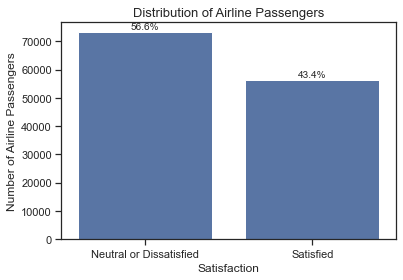

In [12]:
# plotting a bar chat to see Distribution of Airline Passengers
ax = sb.countplot(data = df, 
                   x = 'Satisfaction',
                 color = 'b')
                   
# displaying percentage 
lenght = len(df)
for i in ax.patches:
    percentage = f'{100 * i.get_height() / lenght:.1f}%\n'
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'center')

# plot labels
plt.xlabel('Satisfaction')
plt.ylabel('Number of Airline Passengers')
plt.title('Distribution of Airline Passengers', size = 13)
plt.show()

Inference 

The Distribution of Airline Passengers shows that among the 129,880 Airline Passengers, 56.6%  are Neutral or Dissatisfied while 43.4% are satisfied.

#### 2. What is the distribution of each variable?


To answer this, features will be divided into 3 columns:  The rated columns which contains rated values of Airline passengers, Numerical colums, and categorical columns. 

> Next up, is the distribution of some predictor variables: **Baggage Handling, Cleanliness, Ease of Online Booking, On-board Service, In-flight Wifi Service, Departure and Arrival Time Convenience, Gate Location, Food and Drink,
Online Boarding, Seat Comfort, In-flight Entertainment, Leg Room Service, Check-in Service,
In-flight Service**.


####  Features with Binary Values   

In [13]:
# seperating features with rated values 

rated_columns = ['Baggage Handling', 'Cleanliness', 'Ease of Online Booking', 'On-board Service',
                'In-flight Wifi Service', 'Departure and Arrival Time Convenience','Gate Location','Food and Drink',
                'Online Boarding','Seat Comfort','In-flight Entertainment','Leg Room Service','Check-in Service',
                'In-flight Service']

   Baggage Handling  count  Percentage
0                 1   9008        6.96
1                 2  14316       11.06
2                 3  25771       19.90
3                 4  46631       36.01
4                 5  33761       26.07


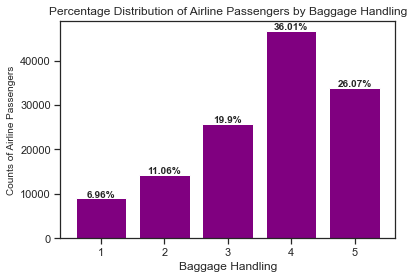

   Cleanliness  count  Percentage
0            0     14        0.01
1            1  16680       12.88
2            2  20049       15.48
3            3  30552       23.59
4            4  33871       26.16
5            5  28321       21.87


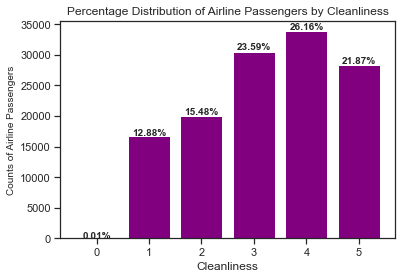

   Ease of Online Booking  count  Percentage
0                       0   5666        4.38
1                       1  21808       16.84
2                       2  29983       23.16
3                       3  30297       23.40
4                       4  24362       18.81
5                       5  17371       13.42


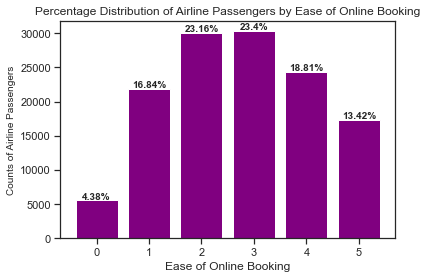

   On-board Service  count  Percentage
0                 0      5        0.00
1                 1  14738       11.38
2                 2  18290       14.12
3                 3  28460       21.98
4                 4  38587       29.80
5                 5  29407       22.71


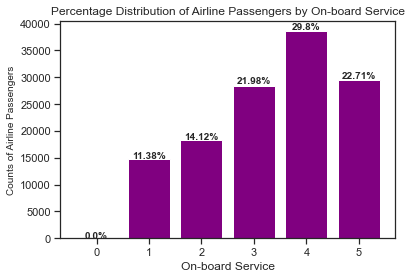

   In-flight Wifi Service  count  Percentage
0                       0   3908        3.02
1                       1  22250       17.18
2                       2  32236       24.90
3                       3  32087       24.78
4                       4  24702       19.08
5                       5  14304       11.05


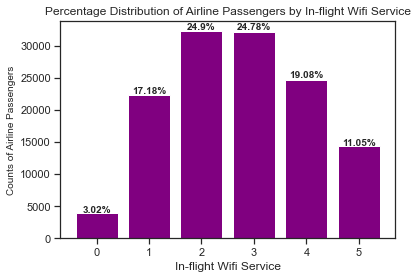

   Departure and Arrival Time Convenience  count  Percentage
0                                       0   6664        5.15
1                                       1  19351       14.94
2                                       2  21478       16.59
3                                       3  22302       17.22
4                                       4  31786       24.55
5                                       5  27906       21.55


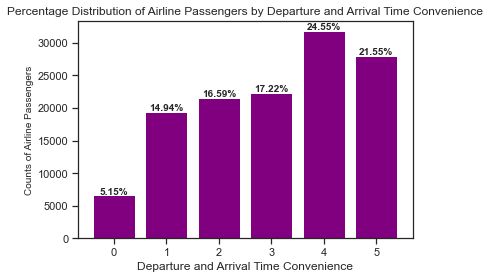

   Gate Location  count  Percentage
0              0      1        0.00
1              1  21926       16.93
2              2  24219       18.70
3              3  35611       27.50
4              4  30376       23.46
5              5  17354       13.40


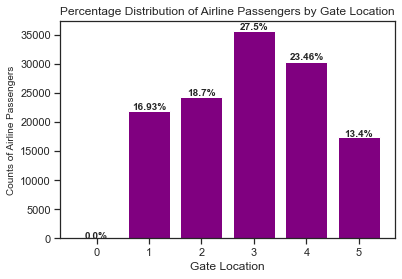

   Food and Drink  count  Percentage
0               0    130        0.10
1               1  16010       12.36
2               2  27293       21.08
3               3  27712       21.40
4               4  30477       23.54
5               5  27865       21.52


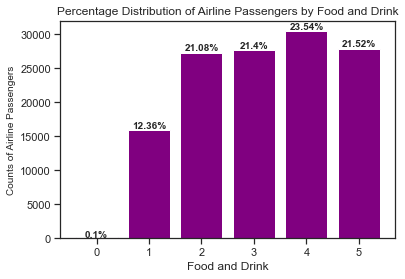

   Online Boarding  count  Percentage
0                0   3071        2.37
1                1  13216       10.21
2                2  21866       16.89
3                3  27040       20.88
4                4  38353       29.62
5                5  25941       20.03


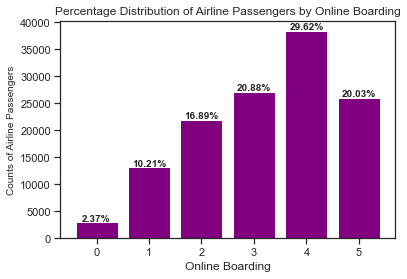

   Seat Comfort  count  Percentage
0             0      1        0.00
1             1  15059       11.63
2             2  18462       14.26
3             3  23258       17.96
4             4  39651       30.62
5             5  33056       25.53


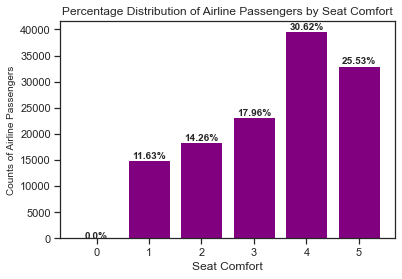

   In-flight Entertainment  count  Percentage
0                        0     18        0.01
1                        1  15634       12.07
2                        2  21897       16.91
3                        3  23805       18.38
4                        4  36682       28.33
5                        5  31451       24.29


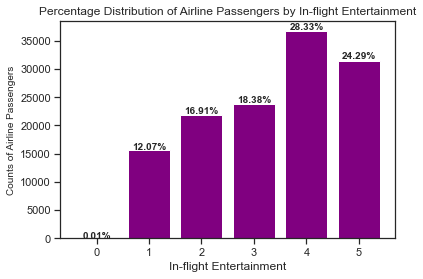

   Leg Room Service  count  Percentage
0                 0    596        0.46
1                 1  12846        9.92
2                 2  24469       18.90
3                 3  24982       19.29
4                 4  35779       27.63
5                 5  30815       23.80


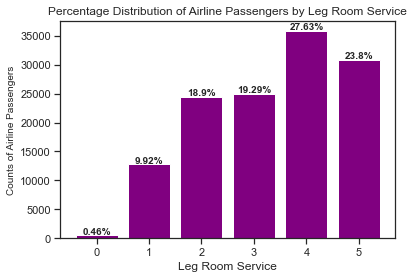

   Check-in Service  count  Percentage
0                 0      1        0.00
1                 1  16058       12.40
2                 2  16056       12.40
3                 3  35343       27.29
4                 4  36229       27.98
5                 5  25800       19.92


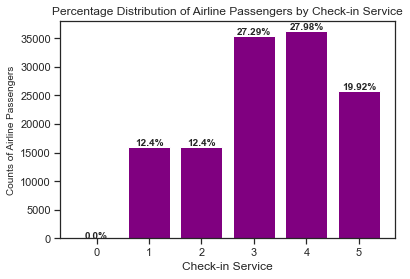

   In-flight Service  count  Percentage
0                  0      5        0.00
1                  1   8838        6.83
2                  2  14252       11.01
3                  3  25232       19.49
4                  4  47198       36.45
5                  5  33962       26.23


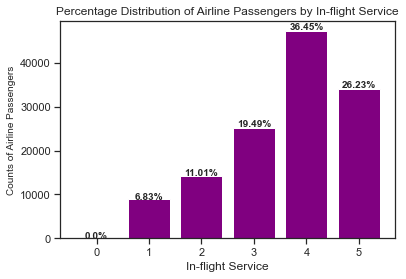

In [14]:
# assigning data
for each_col in rated_columns:
    data = df.groupby(each_col)[each_col].count()\
                    .to_frame()\
                    .rename(columns = {each_col: 'count'})\
                    .reset_index(level = 0)

# printing percentage value on each bar
    percentage = []
    for i in range(data.shape[0]):
        total_count = data['count'].sum()
        pct = (data['count'][i] / total_count) * 100
        percentage.append(round(pct,2))
    data['Percentage'] = percentage
    print(data)
    
 # depict illustration 
    use_color = ('Purple')
    graph = plt.bar(data[each_col], data['count'], color = use_color)
    plt.title('Percentage Distribution of Airline Passengers by ' + each_col, size = 12)
    plt.xlabel(each_col, size = 12)
    plt.ylabel('Counts of Airline Passengers', size = 10)
    
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
        i+=1
    plt.show()

Inference

From the plots above, we see that the rated colums are ratings given by Airline Passengers based on services rendered by the Airline. The ratings are from 0-5, 0 being the lowest raing and 5 being the highest. 

We see that Airline service with the highest ratings of 4 and 5 are In-flight Service, Baggage Handling, follwed by On-board Service, Seat Comfort, Online Boarding, Leg Room Service, Cleanliness, In-flight Entertainment, Departure and Arrival Time Convenience and Check-in Service. On the other hand, Airline service with the lowest ratings of 2 and 3 are In-flight Wifi Service, Ease of Online Booking.

> Next up, is the distribution of some predictor variables: **Gender, Customer Type, Type of Travel, Class**.


####  Features with Categorical Values   

In [15]:
# features with categorical values 
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

   Gender  count  Percentage
0  Female  65703       50.74
1    Male  63784       49.26


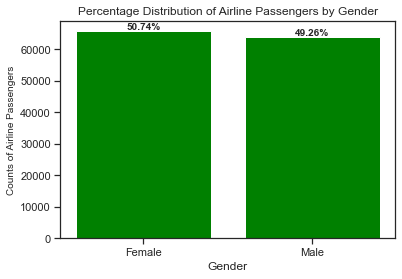

  Customer Type   count  Percentage
0    First-time   23714       18.31
1     Returning  105773       81.69


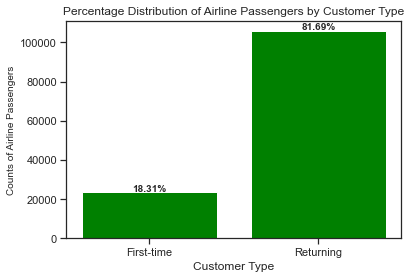

  Type of Travel  count  Percentage
0       Business  89445       69.08
1       Personal  40042       30.92


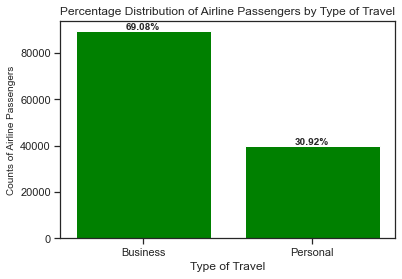

          Class  count  Percentage
0      Business  61990       47.87
1       Economy  58117       44.88
2  Economy Plus   9380        7.24


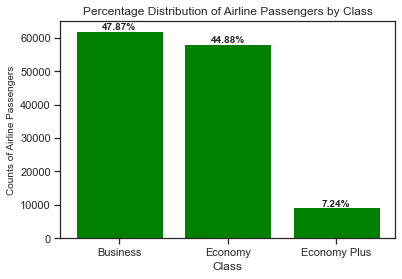

In [16]:
# assigning data
for each_cat_col in categorical_columns:
    data = df.groupby(each_cat_col)[each_cat_col].count()\
                    .to_frame()\
                    .rename(columns = {each_cat_col: 'count'})\
                    .reset_index(level = 0)

# printing percentage value on each bar
    percentage = []
    for i in range(data.shape[0]):
        total_count = data['count'].sum()
        pct = (data['count'][i] / total_count) * 100
        percentage.append(round(pct,2))
    data['Percentage'] = percentage
    print(data)
    
 # depict illustration   
    use_color = ('Green')
    graph = plt.bar(data[each_cat_col], data['count'], color = use_color)
    plt.title('Percentage Distribution of Airline Passengers by ' + each_cat_col, size = 12)
    plt.xlabel(each_cat_col, size = 12)
    plt.ylabel('Counts of Airline Passengers', size = 10)
    
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
             y+height*1.01,
             str(data.Percentage[i])+'%',
             ha='center',
             weight='bold')
        i+=1
    plt.show()

Inference

From the categorical column plots above, we see that the Percentage Distribution of Airline Passengers is more for female, Returing customers, Business purpose and Business-Class than the rest. This means that, the Distribution of Airline Passengers is 50.74% female,  81.69% Returning customers, 69.08% for Business purpose and 47.87% Business-Class type compared to the rest.

> Next up, is the distribution of some predictor variables: **Age, Flight Distance, Departure Delay, Arrival Delay**.


####  Features with Numeric Values   

In [17]:
# features with numerical values
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

    Age  count
0     7    682
1     8    793
2     9    852
3    10    820
4    11    831
..  ...    ...
70   77    106
71   78     44
72   79     52
73   80    110
74   85     25

[75 rows x 2 columns]


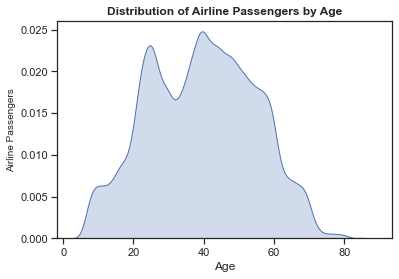

      Flight Distance  count
0                  31     11
1                  56     11
2                  67    160
3                  73     77
4                  74     42
...               ...    ...
3816             4243     23
3817             4502     14
3818             4817      6
3819             4963     19
3820             4983     16

[3821 rows x 2 columns]


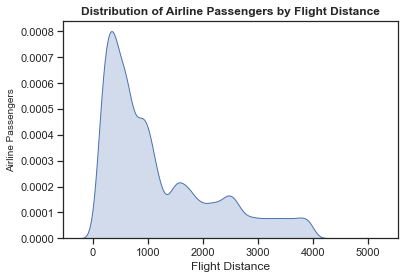

     Departure Delay  count
0                  0  73209
1                  1   3671
2                  2   2845
3                  3   2530
4                  4   2298
..               ...    ...
459              978      1
460             1017      1
461             1128      1
462             1305      1
463             1592      1

[464 rows x 2 columns]


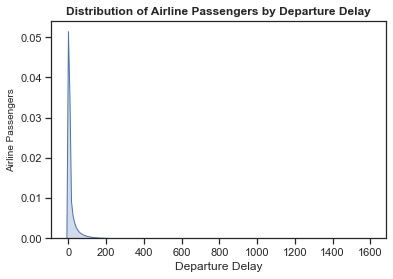

     Arrival Delay  count
0              0.0  72753
1              1.0   2747
2              2.0   2587
3              3.0   2442
4              4.0   2373
..             ...    ...
467          970.0      1
468         1011.0      1
469         1115.0      1
470         1280.0      1
471         1584.0      1

[472 rows x 2 columns]


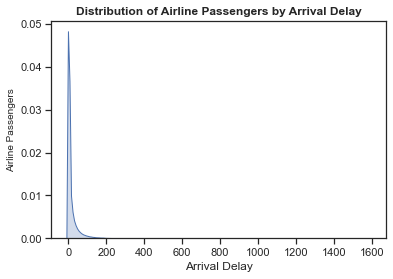

In [18]:
# assigning data
for each_num_col in numerical_columns:
    data = df.groupby(each_num_col)[each_num_col].count()\
                    .to_frame()\
                    .rename(columns = {each_num_col: 'count'})\
                    .reset_index(level = 0)
    
# depict illustration 
    print(data)
    sns.kdeplot(data = df, x = each_num_col, fill = True)
    plt.xlabel(each_num_col, size  = 12 )
    plt.ylabel('Airline Passengers', size = 10)
    plt.title('Distribution of Airline Passengers by ' + each_num_col, weight = 'bold', size =12)
    plt.show()

Inference

From the plots with numerical columns above, we see that the Percentage Distribution of Airline Passengers by their age is more around 20 - 50 than the rest.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Distribution of Airline Passengers shows that among the 129,880 Airline Passengers, 56.6% are Neutral or Dissatisfied while 43.4% are satisfied. 

> The ratings are from 0-5, 0 being the lowest raing and 5 being the highest.
We see that Airline service with the highest ratings of 4 and 5 are In-flight Service, Baggage Handling, follwed by On-board Service, Seat Comfort, Online Boarding, Leg Room Service, Cleanliness, In-flight Entertainment, Departure and Arrival Time Convenience and Check-in Service. On the other hand, Airline service with the lowest ratings of 2 and 3 are In-flight Wifi Service, Ease of Online Booking.

> The categorical column plots shows that the Percentage Distribution of Airline Passengers is more for female, Returing customers, Business purpose and Business-Class than the rest. This means that, the Distribution of Airline Passengers is 50.74% female, 81.69% Returning customers, 69.08% for Business purpose and 47.87% Business-Class type compared to the rest.

> The plots with numerical columns, shows that the Percentage Distribution of Airline Passengers by their age is more around 20 - 50 than the rest.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating variables, Arrival Delay had missing values, the ID column was not useful for gaining insights. All of the missing data were dropped, the ID column was dropped as well from the dataset to move forward.



## Bivariate Exploration

Bivariate Exploration of Features with Rated Values

In [19]:
# Define a function to plot bar plots
def bar_plot(arg1, arg2, arg3, arg4):
    pd.crosstab(arg1, arg2).plot(kind='bar')
    plt.title(arg3)
    plt.xlabel(arg4)
    plt.ylabel('Frequency of Airline Passenger')

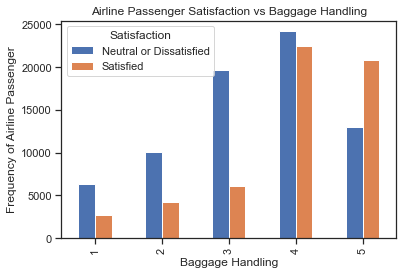

In [20]:
# Calling the bar plot function Satisfaction vs  Baggage Handling
bar_plot(df['Baggage Handling'],df.Satisfaction, 'Airline Passenger Satisfaction vs Baggage Handling', 'Baggage Handling')

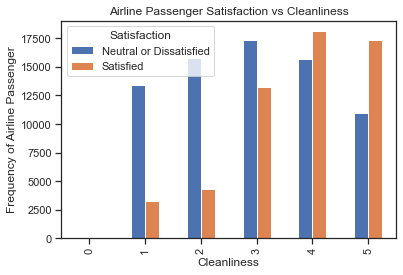

In [21]:
# Calling the bar plot function Satisfaction vs  Cleanliness
bar_plot(df['Cleanliness'],df.Satisfaction, 'Airline Passenger Satisfaction vs Cleanliness', 'Cleanliness')

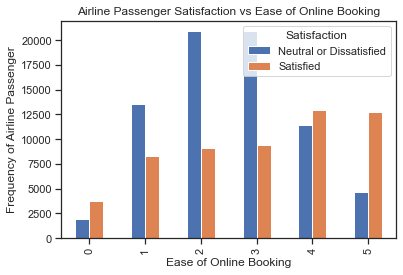

In [22]:
# Calling the bar plot function Satisfaction vs  Ease of Online Booking
bar_plot(df['Ease of Online Booking'],df.Satisfaction, 'Airline Passenger Satisfaction vs Ease of Online Booking', 
         'Ease of Online Booking')

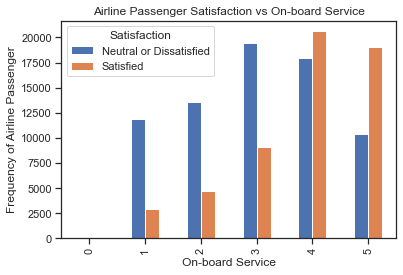

In [23]:
# Calling the bar plot function Satisfaction vs  Ease of Online Booking
bar_plot(df['On-board Service'],df.Satisfaction, 'Airline Passenger Satisfaction vs On-board Service', 'On-board Service')

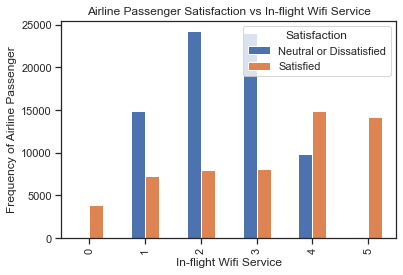

In [24]:
# Calling the bar plot function Satisfaction vs  In-flight Wifi Service
bar_plot(df['In-flight Wifi Service'],df.Satisfaction, 'Airline Passenger Satisfaction vs In-flight Wifi Service',
         'In-flight Wifi Service')

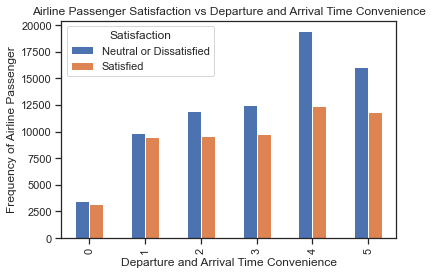

In [25]:
# Calling the bar plot function Satisfaction vs  Departure and Arrival Time Convenience
bar_plot(df['Departure and Arrival Time Convenience'],df.Satisfaction, 
         'Airline Passenger Satisfaction vs Departure and Arrival Time Convenience','Departure and Arrival Time Convenience')

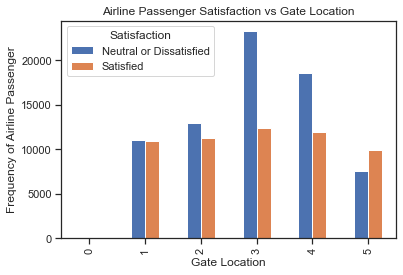

In [26]:
# Calling the bar plot function Satisfaction vs Gate Location
bar_plot(df['Gate Location'],df.Satisfaction, 'Airline Passenger Satisfaction vs Gate Location','Gate Location')

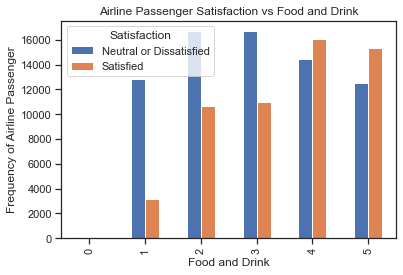

In [27]:
# Calling the bar plot function Satisfaction vs Food and Drink
bar_plot(df['Food and Drink'],df.Satisfaction, 'Airline Passenger Satisfaction vs Food and Drink','Food and Drink')

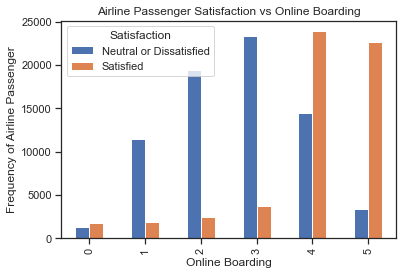

In [28]:
# Calling the bar plot function Satisfaction vs Online Boarding
bar_plot(df['Online Boarding'],df.Satisfaction, 'Airline Passenger Satisfaction vs Online Boarding','Online Boarding')

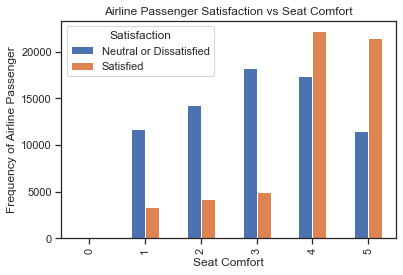

In [29]:
# Calling the bar plot function Satisfaction vs Seat Comfort
bar_plot(df['Seat Comfort'],df.Satisfaction, 'Airline Passenger Satisfaction vs Seat Comfort','Seat Comfort')

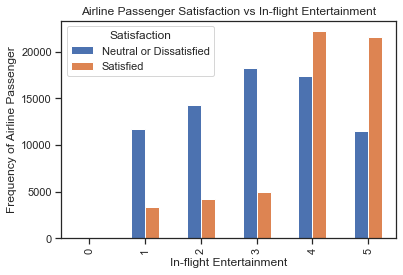

In [30]:
# Calling the bar plot function Satisfaction vs In-flight Entertainment'
bar_plot(df['Seat Comfort'],df.Satisfaction, 'Airline Passenger Satisfaction vs In-flight Entertainment',
         'In-flight Entertainment')

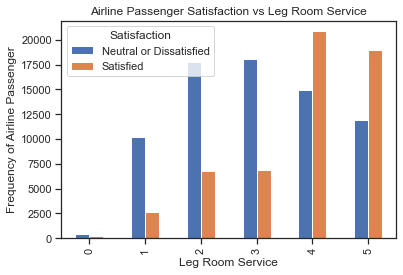

In [31]:
# Calling the bar plot function Satisfaction vs Leg Room Service'
bar_plot(df['Leg Room Service'],df.Satisfaction, 'Airline Passenger Satisfaction vs Leg Room Service', 'Leg Room Service')

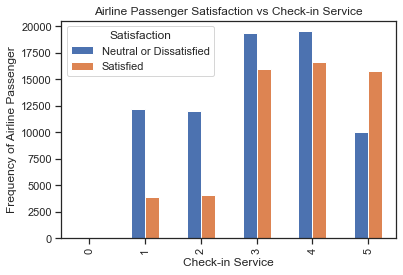

In [32]:
# Calling the bar plot function Satisfaction vs Check-in Service'
bar_plot(df['Check-in Service'],df.Satisfaction, 'Airline Passenger Satisfaction vs Check-in Service', 'Check-in Service')

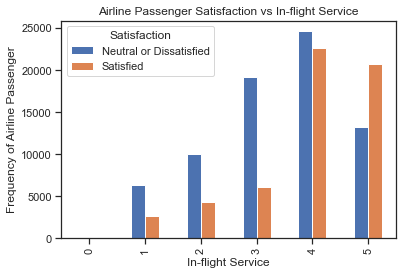

In [33]:
# Calling the bar plot function Satisfaction vs In-flight Service'
bar_plot(df['In-flight Service'],df.Satisfaction, 'Airline Passenger Satisfaction vs In-flight Service', 
         'In-flight Service')

Inference

Airlines Service Ratings are from 0-5. Airline Passenger rate the service by their satisfaction, Neutral or dissatisfied level. from the plots above, the level of satisfaction is seen by the rating made by airline passengers. Services such as Cleanliness, On-board Service, Online Boarding, Seat Comfort, Leg Room Service and In-flight Entertainment has satisfied rating between 4 and 5. However, services such as In-flight Wifi Service, Baggage Handling, Food and Drink, Check-in Service, In-flight Service, Gate Location, Departure and Arrival Time Convenience and Ease of Online Booking has Neutral or dissatisfied rating between 2, 3 and 4.

Bivariate Exploration of Features with Categorical Values

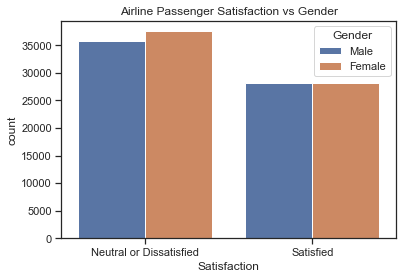

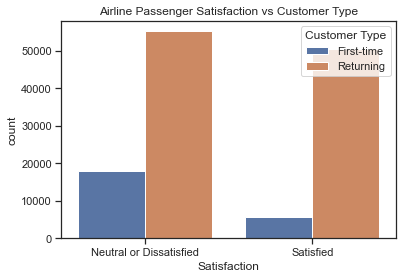

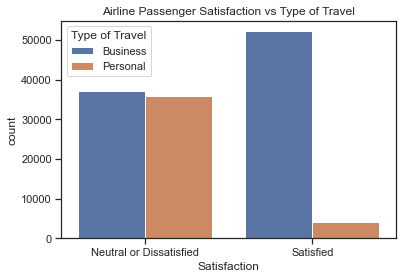

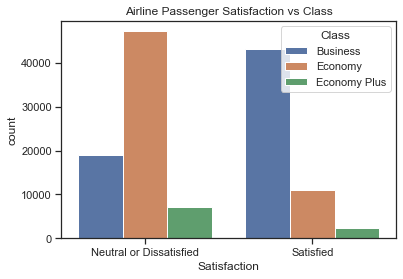

In [34]:
# assigning data
for each_cat_col in categorical_columns:
    data = df
    data[each_cat_col] = data[each_cat_col]
    
    sns.countplot(data = df, 
                  x = 'Satisfaction', 
                  hue = each_cat_col)
    
    plt.title('Airline Passenger Satisfaction vs ' + each_cat_col, size = 12)
    plt.show()

Inference

From the plots of Categorical Values, we see that, there is no much insights with the genders of Airline Passenger, as the level of neutral or dissatisfaction is almost same for both. Also, returning customers are more satisfied than the first-time cutomers. Airline Passenger travelling for Business reason are more satisfied than Passenger travelling for Personal reasons, and the Airline Passenger on Business-Class are more satisfied than those on Economy-Class and Economy-Class plus.


#### 3. What is the relationships between features in the dataset?

Pairwise correlationsCorrelations Present Between Features in The Data.

#### _What is the relationships between the numeric features?_

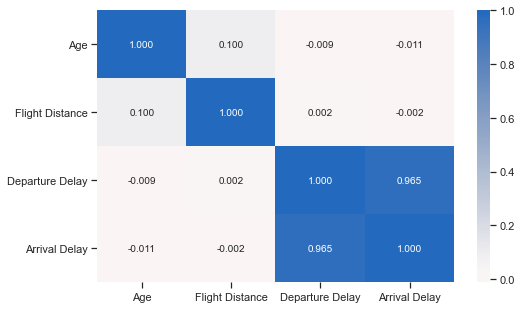

In [35]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numerical_columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Inference

The correlation plot shows that, there is little or no correlation between Airline passener Age and flight distance, however, it shows a high correlation between Airline Departure Delay and Arrival Delay. This implies a linear relationship between them.

#### _What is the relationships between the numeric features against categorical features?_

<AxesSubplot:xlabel='Class', ylabel='Arrival Delay'>

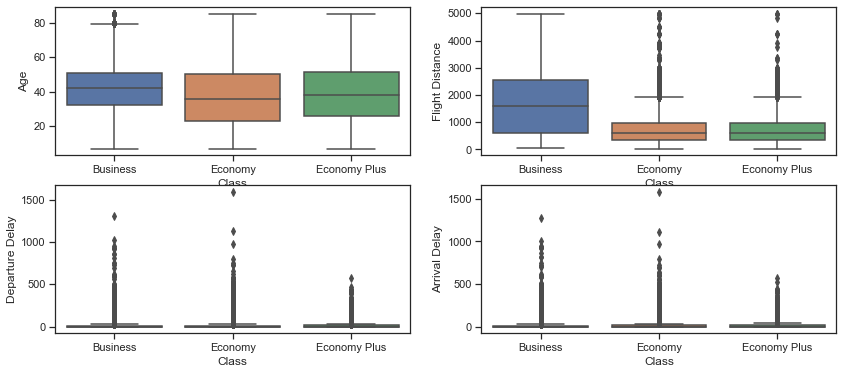

In [36]:
# ploting matrix of numeric features against categorical features.
fig, ax = plt.subplots(2,2, figsize=(14,6))

sns.boxplot(data=df,x='Class',y='Age',ax=ax[0, 0])
sns.boxplot(data=df,x='Class',y='Flight Distance',ax=ax[0, 1])
sns.boxplot(data=df,x='Class',y='Departure Delay',ax=ax[1, 0])
sns.boxplot(data=df,x='Class',y='Arrival Delay',ax=ax[1, 1]) 


Inference

It is interesting to note that there are some positive relationships between the categorical variables and numeric variables of interest. The plot shows that Airline passengers who are younger tend to choose Economy-Class more while the middle age tend to choose Economy plus-Class and the older people tend to choose Business-Class.

Also the Flight Distance is more for passengers on Business class compared to the rest. This means that Business-Class Passengers are more comfortable with longer flight distance.

#### _What is the relationships between the four categorical features?_

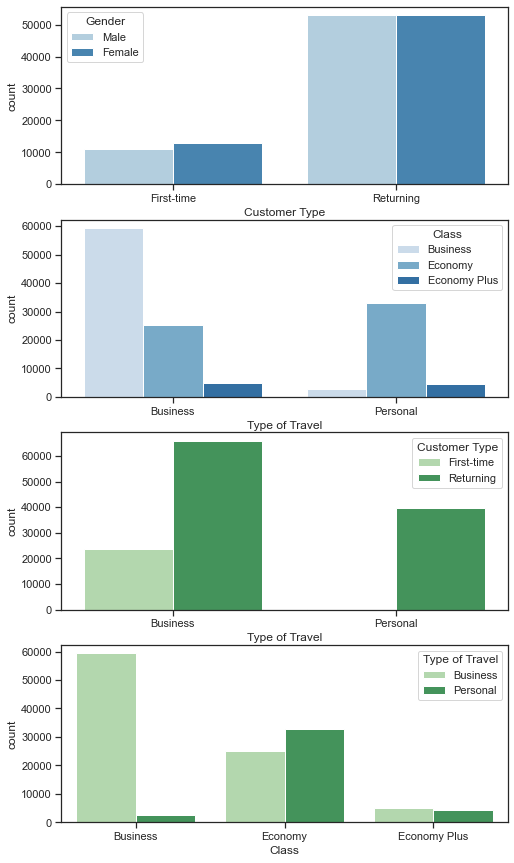

In [37]:
# plotting relationships between the four categorical features.
plt.figure(figsize = [8, 15])

# subplot 1: Customer Type vs Gender
plt.subplot(4, 1, 1)
sb.countplot(data = df, x = 'Customer Type', hue = 'Gender', palette = 'Blues')

# subplot 2: Type of Travel vs. Class
ax = plt.subplot(4, 1, 2)
sb.countplot(data = df, x = 'Type of Travel', hue = 'Class', palette = 'Blues')

# subplot 3: Type of Travel vs. Customer Type
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df, x = 'Type of Travel', hue = 'Customer Type', palette = 'Greens')


# subplot 4: Class vs. Type of Travel
ax = plt.subplot(4, 1, 4)
sb.countplot(data = df, x = 'Class', hue = 'Type of Travel', palette = 'Greens')

plt.show()

Inference

There doesn't seem to be that much interaction between Gender and Customer Type of Airline Passenger, there seems to be some interaction between the Type of Travel and Customer Type of Airline Passenger, as the numbers of Airline Passenger for business reasons is more with the Business class than the Economy Class, the numbers of Airline Passenger for personal reasons is more for Economy Class than the rest. 

#### _What is the relationships among all features?_

<AxesSubplot:>

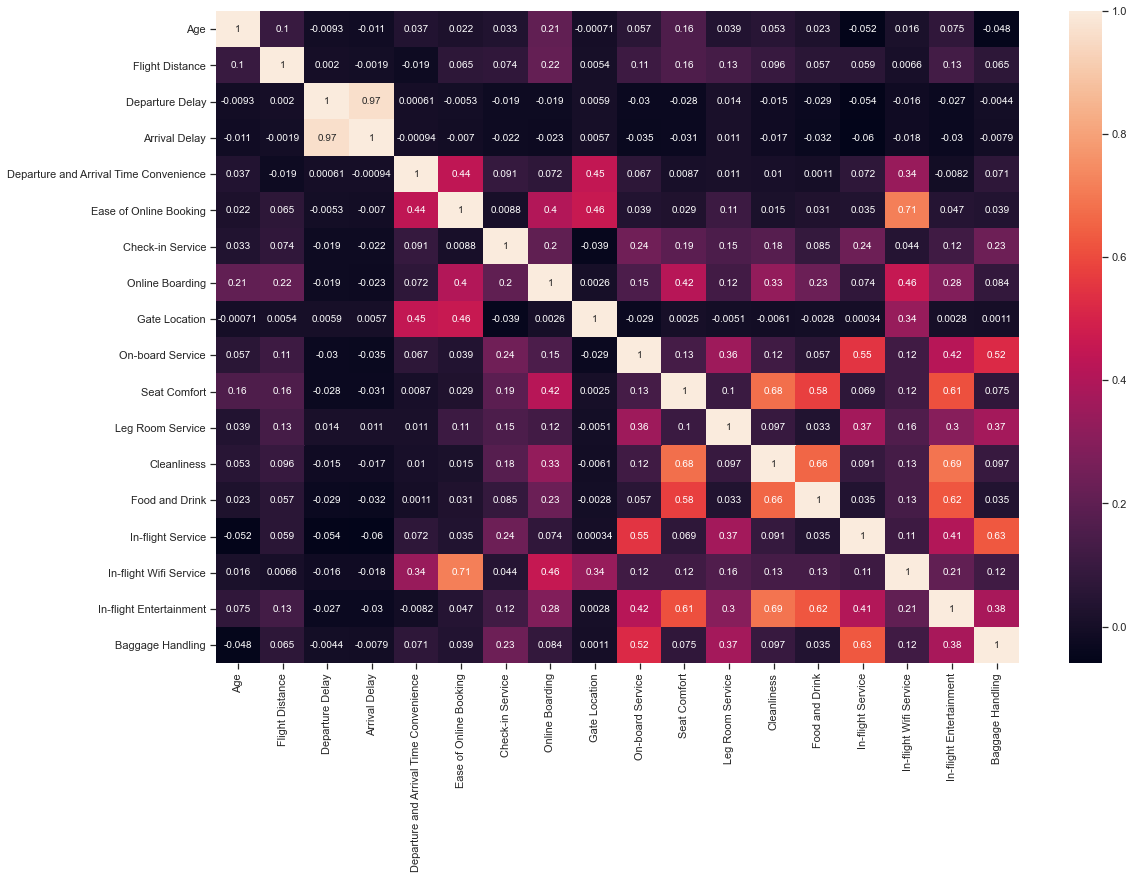

In [38]:
# plotting a correlation plot to see relationships among all features
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot = True)

Inference 

From the correlation plot, we see that the variable with the highest correlation is the Departure delay and Arrival delay with correlation of 0.97. which means it is a stong one as it is close to 1. Also, Cleanliness and Food and drink variable shows a correlation of 0.66 compared to the rest.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The correlation plot shows that, there is little or no correlation between Airline passener Age and flight distance, however, it shows a high correlation between Airline Departure Delay and Arrival Delay. This implies a linear relationship between them.

> The correlation coefficient between Departure Delay and Arrival Delay is very high. Age and Flight Distance don't have strong correlations with any other numeric variables in the dataset.

> It is interesting to note that there are some positive relationships between the categorical variables and numeric variables of interest.The plot shows that the age of Airline Passengers is from 40 for Economy plus, 45 years for Business class, and below 40 for Economy plus. Also the Flight Distance is more for perssengers on Business class compared to the rest. This means that Business Class Passengers are more comfortable with longer flight distance.

> There doesn't seem to be that much interaction between Gender and Customer Type of Airline Passenger, there seems to be some interaction between the Type of Travel and Customer Type of Airline Passenger, as the numbers of Airline Passenger for business reasons is more with the Business class than the Economy Class, the numbers of Airline Passenger for personal reasons is more for Economy Class than the rest. There will be more exploration done further in the next section. 

> From the correlation plot, we see that the variable with the highest correlation is the Departure delay and Arrival delay with correlation of 0.97. which means it is a stong one as it is close to 1. Also, Cleanliness and Food and drink variable shows a correlation of 0.66 compared to the rest.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected relationships were found in the association between Airline passener Age and flight distance, however, it shows a high correlation between Airline Departure Delay and Arrival Delay. This implies a linear relationship between them.

## Multivariate Exploration

In [39]:
# showing correlation among variables
df.corr()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
Age,1.000000,0.099863,-0.009263,-0.011248,0.036780,0.022294,0.033182,0.207485,-0.000709,0.056743,0.159229,0.038992,0.052575,0.023283,-0.051778,0.015779,0.074990,-0.048192
Flight Distance,0.099863,1.000000,0.001992,-0.001935,-0.018901,0.064959,0.073635,0.215082,0.005378,0.111224,0.157825,0.134548,0.095658,0.057136,0.059182,0.006554,0.130518,0.064810
Departure Delay,-0.009263,0.001992,1.000000,0.965291,0.000610,-0.005330,-0.018632,-0.019319,0.005943,-0.030471,-0.027711,0.014339,-0.014553,-0.029351,-0.054329,-0.016046,-0.027166,-0.004425
Arrival Delay,-0.011248,-0.001935,0.965291,1.000000,-0.000942,-0.007033,-0.021705,-0.022730,0.005658,-0.034789,-0.030521,0.011346,-0.016546,-0.031715,-0.059853,-0.017749,-0.030230,-0.007935
Departure and Arrival Time Convenience,0.036780,-0.018901,0.000610,-0.000942,1.000000,0.437697,0.091217,0.072175,0.447411,0.067046,0.008707,0.010634,0.010021,0.001057,0.072166,0.344846,-0.008189,0.070646
Ease of Online Booking,0.022294,0.064959,-0.005330,-0.007033,0.437697,1.000000,0.008835,0.404944,0.460155,0.039039,0.028602,0.109341,0.015150,0.030638,0.035356,0.714888,0.046669,0.039215
Check-in Service,0.033182,0.073635,-0.018632,-0.021705,0.091217,0.008835,1.000000,0.204215,-0.039294,0.244620,0.189838,0.152715,0.176611,0.085103,0.237737,0.043847,0.119664,0.234732
Online Boarding,0.207485,0.215082,-0.019319,-0.022730,0.072175,0.404944,0.204215,1.000000,0.002579,0.154272,0.419169,0.123149,0.329331,0.233524,0.073973,0.457422,0.284008,0.083563
Gate Location,-0.000709,0.005378,0.005943,0.005658,0.447411,0.460155,-0.039294,0.002579,1.000000,-0.029109,0.002493,-0.005146,-0.006066,-0.002825,0.000337,0.338547,0.002751,0.001097
On-board Service,0.056743,0.111224,-0.030471,-0.034789,0.067046,0.039039,0.244620,0.154272,-0.029109,1.000000,0.130654,0.357877,0.122208,0.057476,0.551460,0.120028,0.418863,0.520400


#### _What is the relationships among multiple features?_

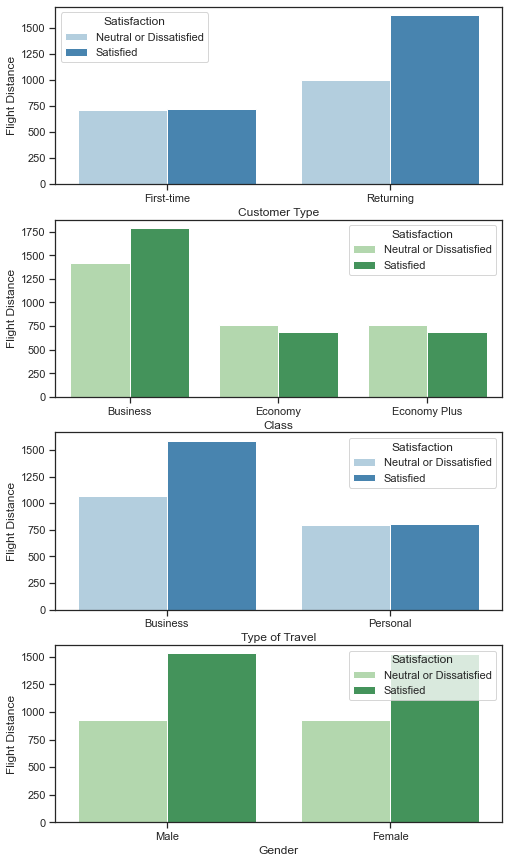

In [40]:
# plotting relationships between the four categorical features.
plt.figure(figsize = [8, 15])

# subplot 1: Flight Distance by Customer Type
plt.subplot(4, 1, 1)
sns.barplot(data=df, x = 'Customer Type', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Blues', ci=None)

# subplot 2: Flight Distance by Class
ax = plt.subplot(4, 1, 2)
sns.barplot(data=df, x = 'Class', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Greens', ci=None)

# subplot 3: Flight Distance by Type of Travel
ax = plt.subplot(4, 1, 3)
sns.barplot(data=df, x = 'Type of Travel', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Blues', ci=None)


# subplot 4: Flight Distance by Gender
ax = plt.subplot(4, 1, 4)
sns.barplot(data=df, x = 'Gender', y = 'Flight Distance', hue = 'Satisfaction', palette = 'Greens', ci=None)

plt.show()

Inference

It is interesting to note that there are some positive relationships between the categorical variables and numeric variable Flight distance. 

We see that the gender variable does not have so much insight, as there is no difference between the male and female. However, for Returning Airline Passenger the level of satisfaction and travel distance is high compared to the First time Airline Passenger. Also, for the Business-Class type, the level of satisfaction and travel distance is high compared to Economy and Economy plus-Class. More also for Airline Passenger travelling for Business reason than personal.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I did my investigation in this section by looking at the impact of the  categorical and numeric features. The multivariate exploration showed that there is a positive relationships between the categorical variables and numeric variables such as: Flight distance and the categorical variables, Departure delay and Arrival delay, Cleanliness, Food and drink variable.

### Were there any interesting or surprising interactions between features?

> Looking back on the plots of Categorical Values, we see that, there is no much insights with the genders of Airline Passenger, however, this does not mean it is not an important variable. 

## Conclusions

> From the Analysis, it can be concluded that the most satisfied customers are those in the Business-Class and the least satisfied customers were those in The Economy-Class. The Returning customers are the most satisfied customers while the first time customers were the least satisfied customers. Also, Airline Passenger travelling on Business purpose are the most satisfied customers than those travelling for Personal reason. 

> Furthermore, there are some positive relationships between the categorical variables and numeric variables of interest. The plot shows that Airline passengers who are younger tend to choose Economy-Class more while the middle age tend to choose Economy plus-Class and the older people tend to choose Business-Class. And Business-Class Passengers are more comfortable with longer flight distance.

> Finally, we can recommend that in order to improve overall satisfaction, Airlines should focus more on the Economy-Class, First time Passengers and Passenger travelling for Personal reasons.

